# Summary Statistics of SDSS Quiescent galaxies
There's been some issues dealing with simulated galaxies with instantaneous SFR=0 (see Issues [#31](https://github.com/IQcollaboratory/galpopFM/issues/31). These galaxies **in principle** because they don't have gas should not have dust. However, they have a sharp feature in the observable space and as a result impact the DEM parameters we infer. 

It's clear that these simulated galaxies disagree with observables. More importantly, we want to marginalize out this population in our DEM parameter infernece. One way to do this would be to assign quiescent galaxy observables consistent with DSSS to the SFR=0 population. Then these galaxies will not contribute to the discrepancy between the FM and observations. 

In this notebook we're going to examine the observables of SDSS quiescent galaxies. 

In [1]:
import os
import h5py 
import numpy as np 
# -- galpopfm --
from galpopfm.catalogs import Catalog
# -- plotting --
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [2]:
dat_dir = os.environ['GALPOPFM_DIR']

In [3]:
sdss = Catalog('tinker')

In [4]:
M_fuv, M_nuv, _, M_g, M_r, _, _ = sdss.data['NSA_ABSMAG'].T

cuts = (
    (M_r < -20.) & 
    (M_fuv != -999) &
    (M_nuv != -999))

z_sdss = sdss.data['redshift'][cuts]

Fmag    = M_fuv[cuts]
Nmag    = M_nuv[cuts]
Rmag    = M_r[cuts]
Gmag    = M_g[cuts]

FUV_NUV =  Fmag - Nmag
G_R = Gmag - Rmag 

In [5]:
logmstar = sdss.data['log.M_star'][cuts]
logssfr = sdss.data['log.ssfr'][cuts]
logsfr = logssfr + logmstar

Lets impose a simple SSFR based classication for quiescent galaxies and examine how their observables look

In [6]:
# simple SSFR Q cut
quiescent = (logssfr < -11.)

(-15.0, -7.0)

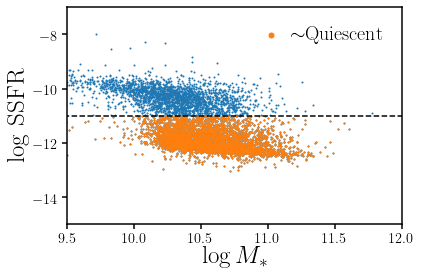

In [7]:
fig = plt.figure(figsize=(6,4))
sub = fig.add_subplot(111)
sub.scatter(logmstar, logssfr, c='C0', s=1)
sub.plot([9., 12.], [-11., -11.], c='k', ls='--')
sub.scatter(logmstar[quiescent], logssfr[quiescent], c='C1', s=1, label='$\sim$Quiescent')
sub.legend(loc='upper right', markerscale=5, handletextpad=0., fontsize=20)
sub.set_xlabel('$\log M_*$', fontsize=25)
sub.set_xlim(9.5, 12.)
sub.set_ylabel('$\log$ SSFR', fontsize=25)
sub.set_ylim(-15., -7)

(-1.0, 5.0)

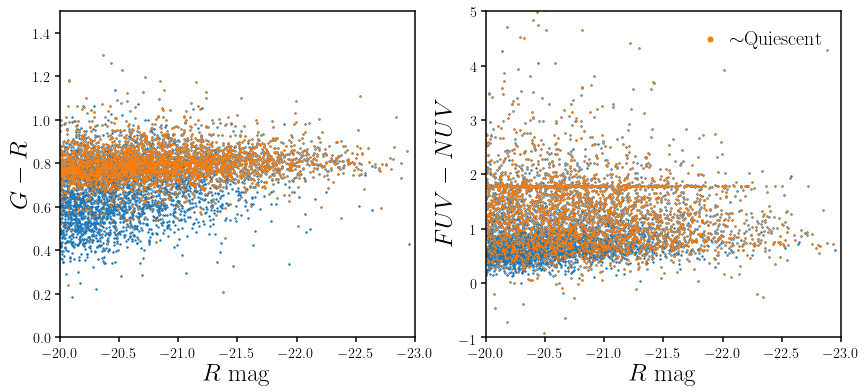

In [8]:
fig = plt.figure(figsize=(14, 6))
sub = fig.add_subplot(121)
sub.scatter(Rmag, G_R, c='C0', s=2)
sub.scatter(Rmag[quiescent], G_R[quiescent], c='C1', s=1)
sub.set_xlabel('$R$ mag', fontsize=25)
sub.set_xlim(-20., -23)
sub.set_ylabel('$G-R$', fontsize=25)
sub.set_ylim(0., 1.5)

sub = fig.add_subplot(122)
sub.scatter(Rmag, FUV_NUV, c='C0', s=2)
sub.scatter(Rmag[quiescent], FUV_NUV[quiescent], c='C1', s=1, label='$\sim$Quiescent')
sub.legend(loc='upper right', markerscale=5, handletextpad=0., fontsize=20)
sub.set_xlabel('$R$ mag', fontsize=25)
sub.set_xlim(-20., -23)
sub.set_ylabel('$FUV-NUV$', fontsize=25)
sub.set_ylim(-1., 5.)

As expected, redder galaxies are quiescent. Lets take a closer look at the distribution of the colors for quiescent galaxies

(-1.0, 5.0)

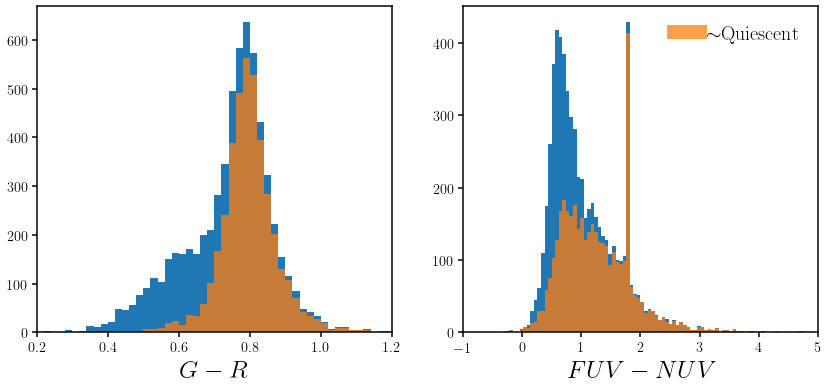

In [9]:
fig = plt.figure(figsize=(14, 6))
sub = fig.add_subplot(121)
_ = sub.hist(G_R, range=(0.2, 1.2), bins=50, color='C0')
_ = sub.hist(G_R[quiescent], range=(0.2, 1.2), bins=50, alpha=0.75, color='C1')
sub.set_xlabel('$G-R$', fontsize=25)
sub.set_xlim(0.2, 1.2)

sub = fig.add_subplot(122)
_ = sub.hist(FUV_NUV, range=(-1., 5.), bins=100, color='C0')
_ = sub.hist(FUV_NUV[quiescent], range=(-1., 5.), bins=100, color='C1', alpha=0.75, label='$\sim$Quiescent')
sub.legend(loc='upper right', markerscale=5, handletextpad=0., fontsize=20)
sub.set_xlabel('$FUV-NUV$', fontsize=25)
sub.set_xlim(-1., 5.)

Is there a significant luminosity dependence on the distrubtion?

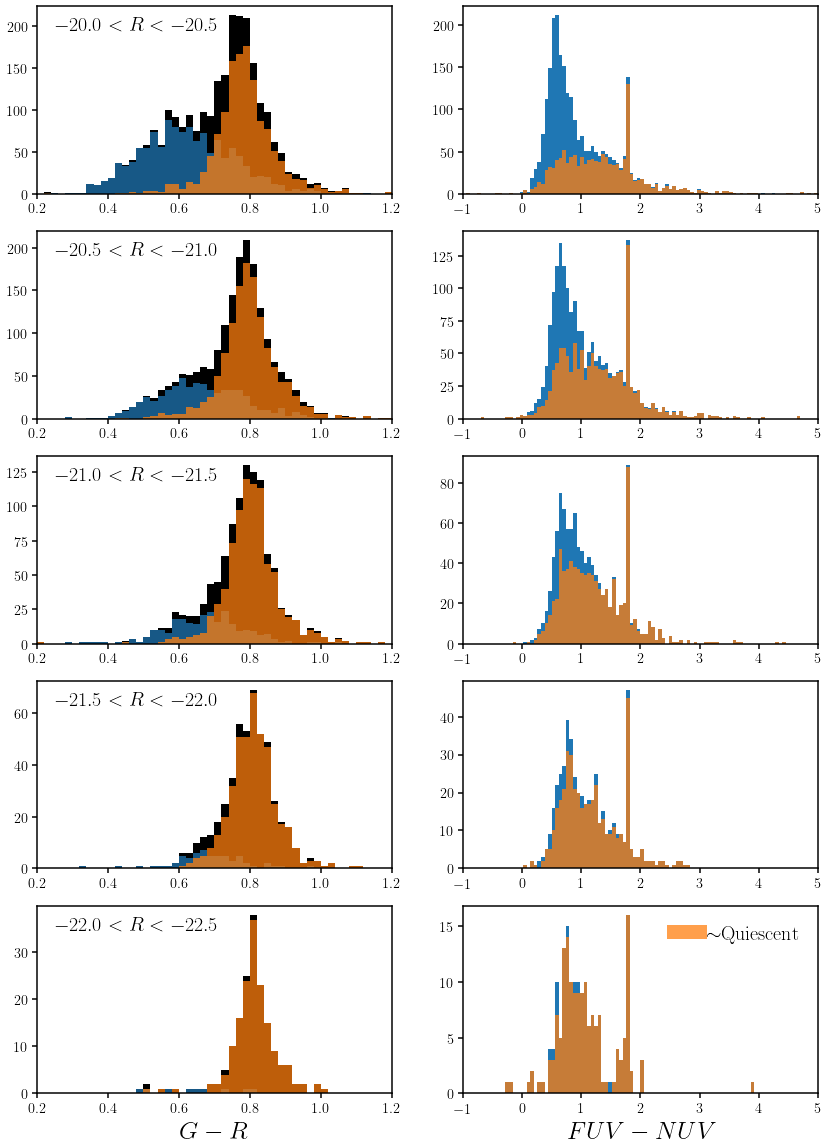

In [10]:
fig = plt.figure(figsize=(14, 20))
for i in range(5): 
    rbin = (Rmag < -20-0.5*i) & (Rmag > -20-0.5*(i+1))

    sub1 = fig.add_subplot(5,2,2*i+1)
    _ = sub1.hist(G_R[rbin], range=(0.2, 1.2), bins=50, color='k')
    _ = sub1.hist(G_R[~quiescent & rbin], range=(0.2, 1.2), bins=50, alpha=0.75, color='C0')
    _ = sub1.hist(G_R[quiescent & rbin], range=(0.2, 1.2), bins=50, alpha=0.75, color='C1')
    sub1.set_xlim(0.2, 1.2)
    sub1.text(0.05, 0.95, r'$%.1f < R < %.1f$' % (-20-0.5*i, -20-0.5*(i+1)), 
              ha='left', va='top', transform=sub1.transAxes, fontsize=20)

    sub2 = fig.add_subplot(5,2,2*i+2)
    _ = sub2.hist(FUV_NUV[rbin], range=(-1., 5.), bins=100, color='C0')
    _ = sub2.hist(FUV_NUV[~quiescent & rbin], range=(-1., 5.), bins=100, color='C0', alpha=0.75)    
    _ = sub2.hist(FUV_NUV[quiescent & rbin], range=(-1., 5.), bins=100, color='C1', alpha=0.75, label='$\sim$Quiescent')
    sub2.set_xlim(-1., 5.)

sub1.set_xlabel('$G-R$', fontsize=25)
sub2.set_xlabel('$FUV-NUV$', fontsize=25)
sub2.legend(loc='upper right', markerscale=5, handletextpad=0., fontsize=20)

Text(0.5, 0, '$FUV-NUV$')

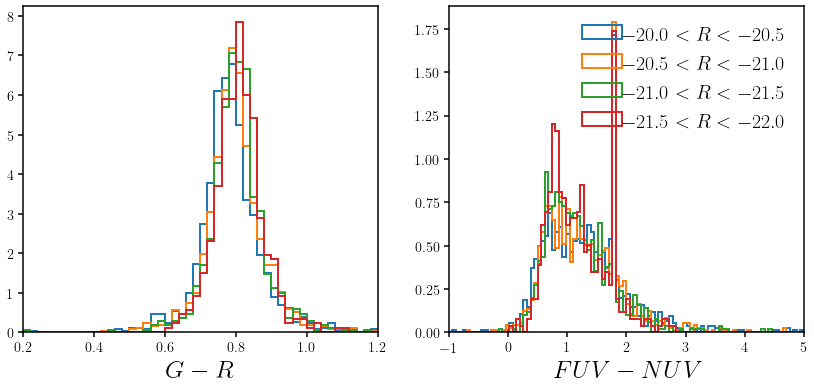

In [11]:
fig = plt.figure(figsize=(14, 6))
sub1 = fig.add_subplot(121)
sub2 = fig.add_subplot(122)
for i in range(4): 
    rbin = (Rmag < -20-0.5*i) & (Rmag > -20-0.5*(i+1))
    _ = sub1.hist(G_R[quiescent & rbin], density=True, histtype='step', range=(0.2, 1.2), bins=50, 
                  linewidth=2, color='C%i' % i)
    sub1.set_xlim(0.2, 1.2)
   
    _ = sub2.hist(FUV_NUV[quiescent & rbin], density=True, histtype='step', range=(-1., 5.), bins=100,
                  linewidth=2, color='C%i' % i, label='$%.1f < R < %.1f$' % (-20-0.5*i, -20-0.5*(i+1)))
    sub2.set_xlim(-1., 5.)

sub1.set_xlabel('$G-R$', fontsize=25)
sub2.legend(loc='upper right', markerscale=5, handletextpad=0., fontsize=20)
sub2.set_xlabel('$FUV-NUV$', fontsize=25)

Not so much. We can sample G-R and FUV-NUV directly from the total SDSS quiescent galaxy population color distributions.

In [12]:
# save the histograms to sample the distribution
nbin, edges = np.histogram(G_R[quiescent], range=(0.2, 1.2), bins=50)

f_hist = os.path.join(dat_dir, 'obs', 'tinker.Mr_20.quiescent.G_R_dist.npy') 
np.save(f_hist, [edges, nbin], allow_pickle=True)

In [13]:
nbin, edges = np.histogram(FUV_NUV[quiescent],range=(-1., 5.), bins=100)

f_hist = os.path.join(dat_dir, 'obs', 'tinker.Mr_20.quiescent.FUV_NUV_dist.npy') 
np.save(f_hist, [edges, nbin], allow_pickle=True)

# test `dust_infer` implementation

In [14]:
from galpopfm import dust_infer as dustInfer

sim_sed = dustInfer._read_sed('simba') 
wlim = (sim_sed['wave'] > 1e3) & (sim_sed['wave'] < 8e3) 

cens    = sim_sed['censat'].astype(bool) # centrals
mlim    = (sim_sed['logmstar'] > 9.4) # mass limit 
zerosfr = sim_sed['logsfr.inst'] == -999

In [15]:
zerosfr = dustInfer._observable_zeroSFR(sim_sed['wave'][wlim], sim_sed['sed_neb'][cens & mlim & zerosfr,:][:,wlim])

(-1.0, 5.0)

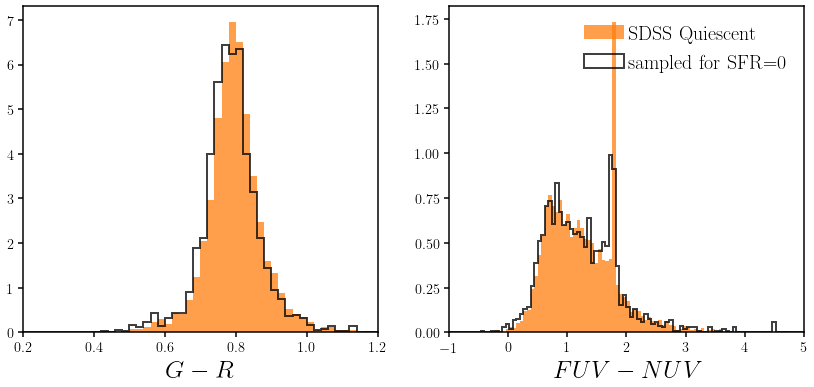

In [16]:
fig = plt.figure(figsize=(14, 6))
sub = fig.add_subplot(121)
_ = sub.hist(G_R[quiescent], range=(0.2, 1.2), bins=50, alpha=0.75, color='C1', density=True)
_ = sub.hist(zerosfr[1], range=(0.2, 1.2), bins=50, alpha=0.75, color='k', histtype='step', linewidth=2, density=True)
sub.set_xlabel('$G-R$', fontsize=25)
sub.set_xlim(0.2, 1.2)

sub = fig.add_subplot(122)
_ = sub.hist(FUV_NUV[quiescent], range=(-1., 5.), bins=100, color='C1', alpha=0.75, density=True, label='SDSS Quiescent')
_ = sub.hist(zerosfr[2], range=(-1., 5.), bins=100, alpha=0.75, color='k', histtype='step', density=True, linewidth=2, label='sampled for SFR=0')
sub.legend(loc='upper right', markerscale=5, handletextpad=0.2, fontsize=20)
sub.set_xlabel('$FUV-NUV$', fontsize=25)
sub.set_xlim(-1., 5.)